In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Hierarchical bipartite

In [17]:
# Theoretical "expected" square weight for the in-edges of a hierarchical bipartite graph of 4n nodes, in prob. p, out prob. q
def expected_weight_in_bipar(n,p,q):
    E2 = (n-1)*p + n*q +1
    E4 = ((n-1)**2)*(p**3) + 2*(n-1)*n*p*(q**2) + (n**2)*p*q**2
    E5 = 2*( (n-1)*p*((1-p**2)**(n-1))*((1-q**2)**(n)) + n*q*(1-p*q)**(2*n-1) )
    return (-4 +4*E2 -2*E4 -2*E5)/E4

In [3]:
# Same for out-edges
def expected_weight_out_bipar(n,p,q):
    return expected_weight_in_bipar(n,q,p)

In [4]:
# Same for total
def average_weight_bipar(n,p,q):
    return (2*(n**2)*p*expected_weight_in_bipar(n,p,q) + 2*(n**2)*q*expected_weight_out_bipar(n,p,q))/(2*(p+q)*n**2)

In [5]:
# For Lukas' simulation
n=20
p=0.7
q=0.1

print('Expected weight for an in-community edge:', expected_weight_in_bipar(n,p,q))
print('Expected weight for an out-community edge:', expected_weight_out_bipar(n,p,q))
print('Expected average weight:', average_weight_bipar(n,p,q))

Expected weight for an in-community edge: -1.5397414217586218
Expected weight for an out-community edge: -0.9458904465231122
Expected average weight: -1.465510049854183


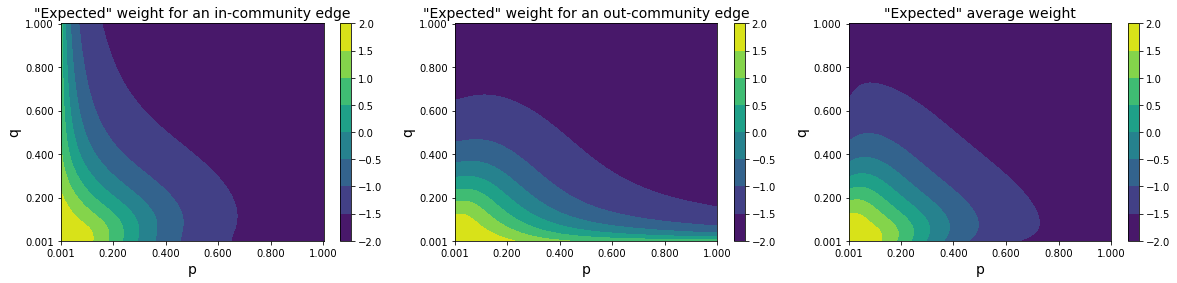

In [6]:
# Expected square weights

# The limit for p,q -> 0 is 2 independent of n for both the in- and out-community edges (checked formulistically)

n=20

p = np.arange(0.001, 1.01, 0.01)
q = np.arange(0.001, 1.01, 0.01)

P, Q = np.meshgrid(p, q)

exp_weight_in=expected_weight_in_bipar(n,P,Q)
exp_weight_out=expected_weight_out_bipar(n,P,Q)
avg_weight=average_weight_bipar(n,P,Q)


fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))

ax0 = ax[0].contourf(P, Q, exp_weight_in)
ax[0].set_xlabel('p',size=14)
ax[0].set_ylabel('q',size=14)
ax[0].set_xticks(np.append(0.001,np.arange(0.2, 1.1, 0.2)))
ax[0].set_yticks(np.append(0.001,np.arange(0.2, 1.1, 0.2)))
ax[0].set_title('"Expected" weight for an in-community edge',size=14)
fig.colorbar(ax0, ax=ax[0])

ax1=ax[1].contourf(P, Q, exp_weight_out)
ax[1].set_xlabel('p',size=14)
ax[1].set_ylabel('q',size=14)
ax[1].set_xticks(np.append(0.001,np.arange(0.2, 1.1, 0.2)))
ax[1].set_yticks(np.append(0.001,np.arange(0.2, 1.1, 0.2)))
ax[1].set_title('"Expected" weight for an out-community edge',size=14)
fig.colorbar(ax1, ax=ax[1])

ax2=ax[2].contourf(P, Q, avg_weight)
ax[2].set_xlabel('p',size=14)
ax[2].set_ylabel('q',size=14)
ax[2].set_xticks(np.append(0.001,np.arange(0.2, 1.1, 0.2)))
ax[2].set_yticks(np.append(0.001,np.arange(0.2, 1.1, 0.2)))
ax[2].set_title('"Expected" average weight',size=14)
fig.colorbar(ax2, ax=ax[2])

plt.show()

# SBM

In [7]:
# Theoretical "expected" square weight for the in-edges of an SBM
# N communities, n nodes per comm., in prob. p, out prob. q, assumed weight of triangles wT
def expected_weight_in_sbm(N,n,p,q,wT):
    E2 = (n-2)*p + (N-1)*n*q + 1
    
    E4 = (n-2)*p**2 + (N-1)*n*q**2 + (n-2)*(n-3)*p**3 + 2*(n-2)*(N-1)*n*p*q**2 + (N-1)*n*(n-1)*p*q**2 + (N-1)*(N-2)*(n**2)*q**3
    
    E5 = 2*( (n-2)*p*(1-p)*((1-p**2)**(n-3))*(1-q**2)**((N-1)*n) + (N-1)*n*q*(1-q)*((1-p*q)**(n-2))*((1-p*q)**(n-1))*(1-q**2)**(n*(N-2)) )
    
    E6 = (n-2)*(n-3)*p*(p**2)*(1-p)**2 + (n-2)*(N-1)*n*q*2*(p*q*(1-p)*(1-q)) + (N-1)*n*(n-1)*p*(q**2)*(1-q)**2 + (N-1)*(N-2)*(n**2)*q*(q**2)*(1-q)**2
    
    ET = (n-2)*p**2 + (N-1)*n*q**2
    
    ES = (n-2)*(n-3)*p**3 + 2*(n-2)*(N-1)*n*p*q**2 + (N-1)*n*(n-1)*p*q**2 + (N-1)*(N-2)*(n**2)*q**3
   
    
    return (-4 +4*E2 -E4 -2*E5 -E6 -wT*ET)/ES

In [8]:
#Same for out-edges
def expected_weight_out_sbm(N,n,p,q,wT):
    E2 = (n-1)*p + (N-2)*n*q + (n-1)*q + 1
    
    E4 = 2*(n-1)*p*q + (N-2)*n*q**2 + 2*(n-1)*(n-2)*(p**2)*q + ((n-1)**2)*(q*p**2 +q**3) + 2*(n-1)*(N-2)*n*(p*q**2 + q**3) + (N-2)*n*(n-1)*p*q**2 + (N-2)*(N-3)*(n**2)*(q**3)
    
    E5 = 2*( (n-1)*p*(1-q)*((1-p*q)**(n-2))*((1-p*q)**(n-1))*(1-q**2)**((N-2)*n) + (N-2)*n*q*(1-q)*((1-p*q)**(2*(n-1)))*((1-q**2)**(n-1))*(1-q**2)**((N-3)*n) + (n-1)*q*(1-p)*((1-p**2)**(n-2))*((1-q**2)**(n-1))*(1-q**2)**((N-2)*n) )
    
    E6 = (n-1)*(n-2)*p*2*(p*q*(1-p)*(1-q)) + ((n-1)**2)*q*((p**2)*((1-q)**2) + ((1-p)**2)*q**2) + 2*(n-1)*(N-2)*n*q*(p*q*(1-q)**2+(q**2)*(1-p)*(1-q)) + (N-2)*n*(n-1)*p*((q**2)*(1-q)**2) + (N-2)*(N-3)*(n**2)*q*((q**2)*(1-q)**2)
    
    ET = 2*(n-1)*p*q + (N-2)*n*q**2
    
    ES = 2*(n-1)*(n-2)*(p**2)*q + ((n-1)**2)*(q*p**2 +q**3) + 2*(n-1)*(N-2)*n*(p*q**2 + q**3) + (N-2)*n*(n-1)*p*q**2 + (N-2)*(N-3)*(n**2)*(q**3)
    
    return (-4 +4*E2 -E4 -2*E5 -E6 -wT*ET)/ES

In [9]:
# Same for total
def average_weight_sbm(N,n,p,q,wT):
    return (N*n*((n-1)/2)*p*expected_weight_in_sbm(N,n,p,q,wT) + N*((N-1)/2)*(n**2)*q*expected_weight_out_sbm(N,n,p,q,wT))/(N*n*((n-1)/2)*p + N*((N-1)/2)*(n**2)*q)

Triangle weight 3
Expected weight for an in-community edge: -0.8994446671974059
Expected weight for an out-community edge: -0.03916232422464894
Expected average weight: -0.7411104936441378


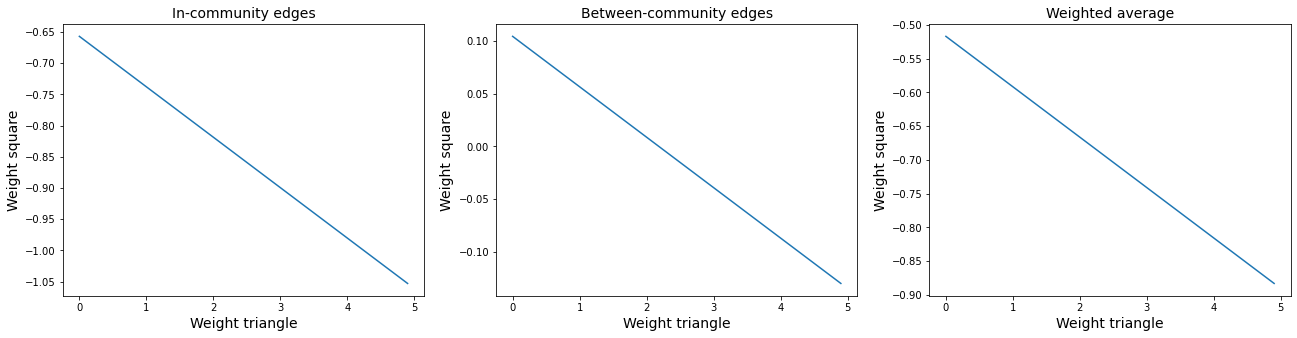

In [10]:
# For Lukas' simulations
N=4
n=20
wT=3 #weight of triangles
p=0.7
q=0.05


fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(22, 5))

x=np.arange(0,5,0.1)
y_in = expected_weight_in_sbm(N,n,p,q,x)
y_out = expected_weight_out_sbm(N,n,p,q,x)
y_avg = average_weight_sbm(N,n,p,q,x)

print('Triangle weight', wT)
print('Expected weight for an in-community edge:', expected_weight_in_sbm(N,n,p,q,wT))
print('Expected weight for an out-community edge:', expected_weight_out_sbm(N,n,p,q,wT))
print('Expected average weight:', average_weight_sbm(N,n,p,q,wT))

ax[0].plot(x, y_in, label='a')
ax[1].plot(x, y_out, label='b')
ax[2].plot(x, y_avg, label='c')

ax[0].set_xlabel('Weight triangle',size=14)
ax[0].set_ylabel('Weight square',size=14)
ax[0].set_title('In-community edges',size=14)
ax[1].set_xlabel('Weight triangle',size=14)
ax[1].set_ylabel('Weight square',size=14)
ax[1].set_title('Between-community edges',size=14)
ax[2].set_xlabel('Weight triangle',size=14)
ax[2].set_ylabel('Weight square',size=14)
ax[2].set_title('Weighted average',size=14)

plt.show()

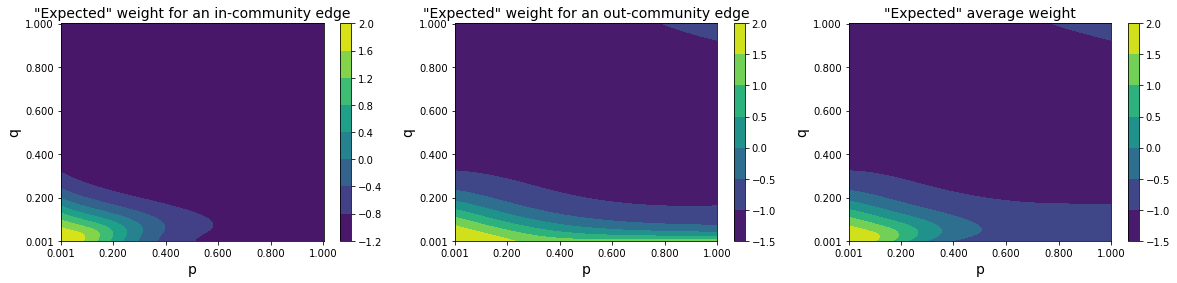

In [11]:
# Expected square weights
# The limit weight for p,q -> 0 is 2 independently of n and N, for both in- and out-edges (checked formulistically).

N=4
n=20
wT=3

p = np.arange(0.001, 1.01, 0.01)
q = np.arange(0.001, 1.01, 0.01)

P, Q = np.meshgrid(p, q)

exp_weight_in=expected_weight_in_sbm(N,n,P,Q,wT)
exp_weight_out=expected_weight_out_sbm(N,n,P,Q,wT)
avg_weight=average_weight_sbm(N,n,P,Q,wT)


fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))

ax0 = ax[0].contourf(P, Q, exp_weight_in)
ax[0].set_xlabel('p',size=14)
ax[0].set_ylabel('q',size=14)
ax[0].set_xticks(np.append(0.001,np.arange(0.2, 1.1, 0.2)))
ax[0].set_yticks(np.append(0.001,np.arange(0.2, 1.1, 0.2)))
ax[0].set_title('"Expected" weight for an in-community edge',size=14)
fig.colorbar(ax0, ax=ax[0])

ax1=ax[1].contourf(P, Q, exp_weight_out)
ax[1].set_xlabel('p',size=14)
ax[1].set_ylabel('q',size=14)
ax[1].set_xticks(np.append(0.001,np.arange(0.2, 1.1, 0.2)))
ax[1].set_yticks(np.append(0.001,np.arange(0.2, 1.1, 0.2)))
ax[1].set_title('"Expected" weight for an out-community edge',size=14)
fig.colorbar(ax1, ax=ax[1])

ax2=ax[2].contourf(P, Q, avg_weight)
ax[2].set_xlabel('p',size=14)
ax[2].set_ylabel('q',size=14)
ax[2].set_xticks(np.append(0.001,np.arange(0.2, 1.1, 0.2)))
ax[2].set_yticks(np.append(0.001,np.arange(0.2, 1.1, 0.2)))
ax[2].set_title('"Expected" average weight',size=14)
fig.colorbar(ax2, ax=ax[2])

plt.show()

# Curvatures as edges disappear

Text(0, 0.5, 'Post edge removal weight')

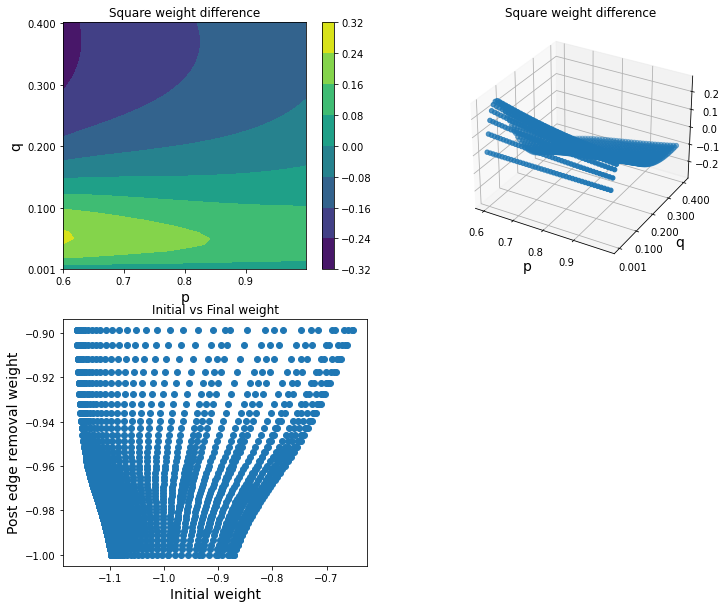

In [59]:
# Comparison of the total average square weight of an SBM vs the average square weight when all out-edges are removed

N=4
n=20
wT=3 #weight of triangles

p = np.arange(0.6, 1.01, 0.01)
q = np.arange(0.001, 0.41, 0.01)

P, Q = np.meshgrid(p, q)

Z= average_weight_sbm(N,n,P,Q,wT) - expected_weight_in_sbm(N,n,P,0,wT)
Z1 = average_weight_sbm(N,n,P,Q,wT)
Z2 = expected_weight_in_sbm(N,n,P,0,wT)

#fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 4))

fig = plt.figure(figsize=(12,10))

ax = fig.add_subplot(2, 2, 1)
ax0 = ax.contourf(P, Q, Z)
ax.set_title('Square weight difference')
ax.set_xlabel('p',size=14)
ax.set_ylabel('q',size=14)
ax.set_xticks(np.arange(0.6, 1.0, 0.1))
ax.set_yticks(np.append(0.001,np.arange(0.1, 0.41, 0.1)))
fig.colorbar(ax0)

ax = fig.add_subplot(2, 2, 2, projection='3d')
ax.scatter3D(P, Q, Z)
ax.set_title('Square weight difference')
ax.set_xlabel('p',size=14)
ax.set_ylabel('q',size=14)
ax.set_xticks(np.arange(0.6, 1.0, 0.1))
ax.set_yticks(np.append(0.001,np.arange(0.1, 0.41, 0.1)))

ax = fig.add_subplot(2, 2, 3)
ax.scatter([Z1[i] for i in range(len(Z1))], [Z2[i] for i in range(len(Z1))])
ax.set_title('Initial vs Final weight')
ax.set_xlabel('Initial weight',size=14)
ax.set_ylabel('Post edge removal weight',size=14)